# Descriptive and Summary statistics

## Table and Dataframe

In [1]:
# Import the pandas library, often aliased as 'pd', which is used for data manipulation and analysis.
import pandas as pd

In [2]:
# Use the 'read_excel' function from pandas to read an Excel file.
# The file 'Datasets for Exercise 2.xls' is located in the 'data' directory.
# The second argument, 'Part2-Q5-Israel Names', specifies the sheet within the Excel file to read.
df = pd.read_excel('data/Datasets for Exercise 2.xls', 'Part2-Q5-Israel Names')

# The 'df' variable now holds the data from the specified Excel sheet for further analysis.

If there are many sheets in the Excel file, then it is better to read whole file and then access different sheets.

In [7]:
# Create an ExcelFile object 'xls' to efficiently handle the Excel file 'Datasets for Exercise 2.xls'.
xls = pd.ExcelFile('data/Datasets for Exercise 2.xls')

# Use the 'read_excel' function to read data from the Excel file 'xls'.
# Read data from the sheet 'Part2-Q5-Israel Names' and store it in the 'df1' DataFrame.
df1 = pd.read_excel(xls, 'Part2-Q5-Israel Names')

# Read data from the sheet 'Part2-Q7-Merrill Lynch' and store it in the 'df2' DataFrame.
df2 = pd.read_excel(xls, 'Part2-Q7-Merrill Lynch')

# Now, 'df1' and 'df2' hold data from their respective sheets for further analysis.

If the Excel file only has one sheet, we do not necessaily include the second arguement.

In [2]:
df3 = pd.read_excel('data/Spatial.xlsx')

In [3]:
df3

,Age group,Subject,No. correct,% correct,City block score,Study time
0,Elderly,1,9,50.0,17,75
1,Elderly,2,8,44.4,15,90
2,Elderly,3,9,50.0,21,40
3,Elderly,4,6,33.3,34,40
4,Elderly,5,5,27.8,35,25
5,Elderly,6,8,44.4,26,30
6,Elderly,7,7,38.9,32,55
7,Elderly,8,8,44.4,36,45
8,Elderly,9,8,44.4,23,35
9,Elderly,10,7,38.9,42,55


In [7]:
df3[selected_columns].describe()

,No. correct,% correct
count,27.000000,27.000000
mean,9.259259,51.433333
std,2.942952,16.359401
min,5.000000,27.800000
25%,7.500000,41.650000
50%,8.000000,44.400000
75%,11.000000,61.100000
max,16.000000,88.900000


## Discriptive Statistics

In [4]:
# Step 1: Select the columns of interest
selected_columns = ['No. correct', '% correct']

In [5]:
# Step 2: Calculate the Mean
mean_values = df3[selected_columns].mean()
print("\nMean Values:")
print(mean_values)


Mean Values:
No. correct     9.259259
% correct      51.433333
dtype: float64


In [6]:
# Step 3: Calculate the Median
median_values = df3[selected_columns].median()
print("\nMedian Values:")
print(median_values)


Median Values:
No. correct     8.0
% correct      44.4
dtype: float64


In [26]:
# Step 4: Calculate the Standard Deviation
std_deviation_values = df3[selected_columns].std()
print("\nStandard Deviation Values:")
print(std_deviation_values)


Standard Deviation Values:
No. correct     2.942952
% correct      16.359401
dtype: float64


In [27]:
# Step 5: Calculate the Variance
variance_values = df3[selected_columns].var()
print("\nVariance Values:")
print(variance_values)


Variance Values:
No. correct      8.660969
% correct      267.630000
dtype: float64


In [28]:
# Step 6: Calculate the Mode
mode_values = df3[selected_columns].mode().iloc[0]  # Select the first mode if multiple modes exist
print("\nMode Values:")
print(mode_values)


Mode Values:
No. correct     8.0
% correct      44.4
Name: 0, dtype: float64


In [29]:
# Step 7: Calculate the Percentiles (25th, 50th, and 75th percentiles)
percentiles_values = df3[selected_columns].quantile([0.25, 0.50, 0.75])
print("\nPercentiles Values:")
print(percentiles_values)


Percentiles Values:
      No. correct  % correct
0.25          7.5      41.65
0.50          8.0      44.40
0.75         11.0      61.10


Now, let's write a function to calculate all above statistics!

In [30]:
import pandas as pd
import numpy as np

def calculate_descriptive_stats(dataframe, columns):
    """
    Calculate descriptive statistics for specified columns in a DataFrame.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names for which statistics should be calculated.

    Returns:
    pd.DataFrame: A DataFrame containing descriptive statistics for the specified columns.
    """

    # Select the specified columns from the DataFrame
    selected_data = dataframe[columns]

    # Calculate statistics
    stats = {
        'Mean': selected_data.mean(),
        'Median': selected_data.median(),
        'Std Deviation': selected_data.std(),
        'Variance': selected_data.var(),
        'Mode': selected_data.mode().iloc[0]  # Calculate the mode and select the first mode if multiple modes exist
    }

    # Calculate percentiles (25th, 50th, and 75th percentiles)
    percentiles = selected_data.quantile([0.25, 0.50, 0.75])

    # Create a DataFrame to store the results
    result_df = pd.DataFrame(stats)
    result_df['25th Percentile'] = percentiles.loc[0.25]
    result_df['50th Percentile'] = percentiles.loc[0.50]
    result_df['75th Percentile'] = percentiles.loc[0.75]

    return result_df

In [31]:
# Example usage:
# Assuming your DataFrame is named 'df', and you want to calculate statistics for 'No. correct' and '% correct' columns.
selected_columns = ['No. correct', '% correct']
result_statistics = calculate_descriptive_stats(df3, selected_columns)
print(result_statistics)

                  Mean  Median  Std Deviation    Variance  Mode  \
No. correct   9.259259     8.0       2.942952    8.660969   8.0   
% correct    51.433333    44.4      16.359401  267.630000  44.4   

             25th Percentile  50th Percentile  75th Percentile  
No. correct             7.50              8.0             11.0  
% correct              41.65             44.4             61.1  


## Graphs

The visualisations often require a bit of tricks and extra lines of code to make things look better. This is often confusing at first, but it will become more and more intuitive once you get the hang of how the general ideas work. We will be working mostly with Matplotlib (often imported as plt), Numpy (np), and pandas (pd). Often, both Matplotlib and pandas offer similar solutions, but one is often slightly more convenient than the other in various situations. Make sure to look up some of the alternatives, as they might also make more sense to you.

In [9]:
# First, we need to import our packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Pie and bar chart

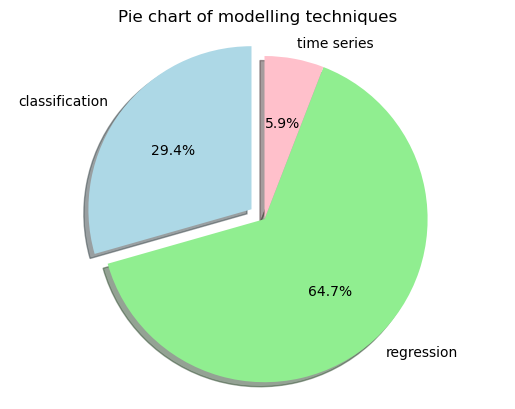

In [10]:
# Data to plot
labels = 'classification', 'regression', 'time series'
sizes = [10, 22, 2]

colors = ['lightblue', 'lightgreen', 'pink']

# Allows us to highlight a certain piece of the pie chart
explode = (0.1, 0, 0)  
 
# Plot a pie chart with the pie() function. Notice how various parameters are given for coloring, labels, etc.
# They should be relatively self-explanatory
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
 
# This function makes the axes equal, so the circle is round
plt.axis('equal')

# Add a title to the plot
plt.title("Pie chart of modelling techniques")

# Finally, show the plot
plt.show()

Adding a legend:

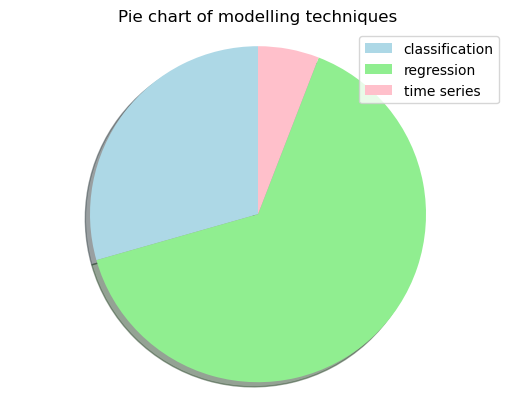

In [11]:
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.title("Pie chart of modelling techniques")
plt.show()

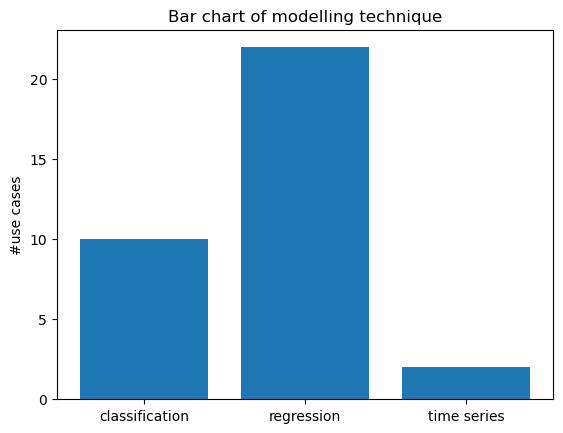

In [12]:
# Bar charts are relatively similar. Here we use the bar() function
plt.bar(labels, sizes, align='center')
plt.xticks(labels)
plt.ylabel('#use cases')
plt.title('Bar chart of modelling technique')
plt.show()

### Histogram

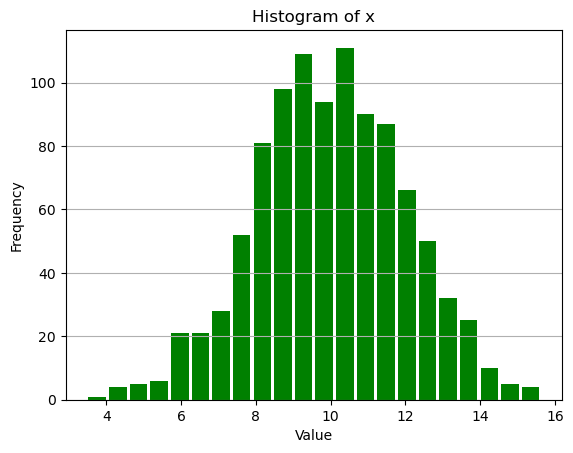

In [13]:
# This function plots a diagram with the 'data' object providing the data
# bins are calculated automatically, as indicated by the 'auto' option, which makes them relatively balanced and
# sets appropriate boundaries
# color sets the color of the bars
# the rwidth sets the bars to somewhat slightly less wide than the bins are wide to leave space between the bars
data = np.random.normal(10, 2, 1000)
plt.hist(x= data, bins='auto', color='#008000', rwidth=0.85)

# For more information on colour codes, please visit: https://htmlcolorcodes.com/

# Additionally, some options are added:

# This option sets the grid of the plot to follow the values on the y-axis
plt.grid(axis='y')

# Adds a label to the x-axis
plt.xlabel('Value')

# Adds a label to the y-axis
plt.ylabel('Frequency')

# Adds a title to the plot
plt.title('Histogram of x')

# Makes the plot visible in the program
plt.show()

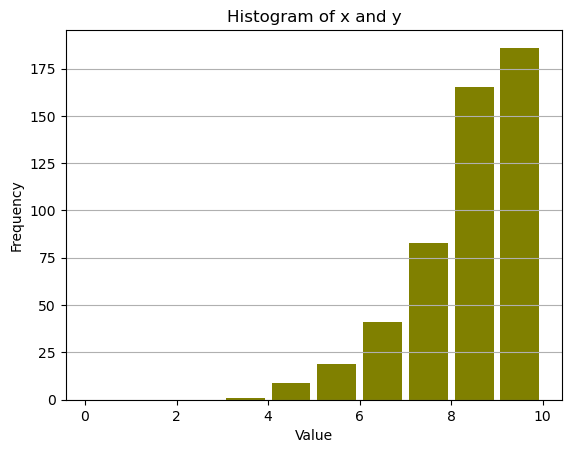

In [14]:
# Here, a different color and manually-specified bins are used
plt.hist(x= data, bins=[0,1,2,3,4,5,6,7,8,9,10], color='olive', rwidth=0.85)
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x and y')
plt.show()

See how we cut the tail off the distribution.

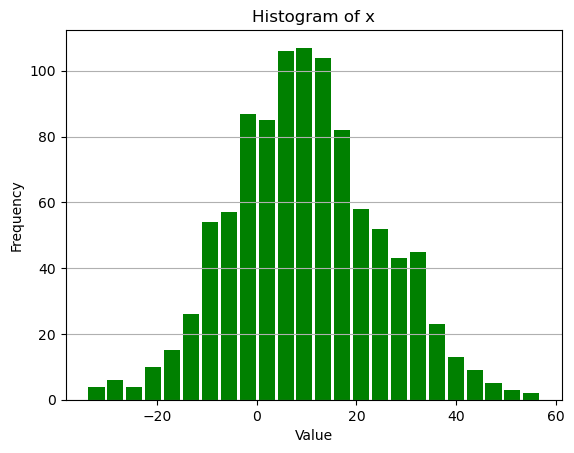

In [18]:
# Now, let's build a histogram with radomly generated data that follows a normal distribution
# Mean = 10, stddev = 15, sample size = 1,000
# More on random numbers will follow in module 2
s = np.random.normal(10, 15, 1000)

plt.hist(x=s, bins='auto', color='#008000', rwidth=0.85)
plt.grid(axis='y')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of x')
plt.show()

<Figure size 640x480 with 0 Axes>

### Boxplot

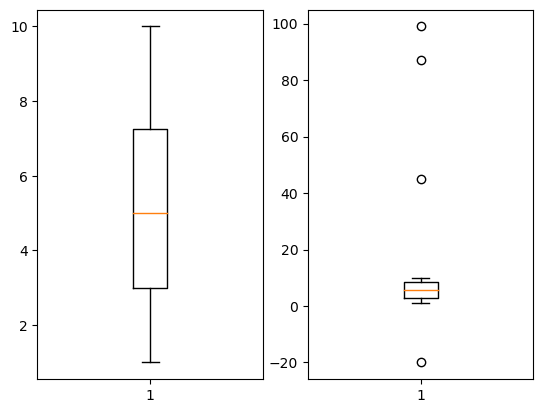

In [39]:
# Boxplots are even easier. We can just use the boxplot() function without many parameters
# We use the implementation of Pandas, which relies on Matplotlib in the background
# We now use subplots.
data = [3,8,3,4,1,7,5,3,8,2,7,3,1,6,10,10,3,6,5,10]
# Subplot with 1 row, 2 columns, here we add figure 1 of 2 (first row, first column)
plt.subplot(1,2,1)   
plt.boxplot(data)

data_2 = [3,8,3,4,1,7,5,3,8,2,7,3,1,6,10,10,3,6,5,10, 99,87,45,-20]
# Here we add figure 2 of 2, hence it will be positioned in the second column of the first row
plt.subplot(1,2,2)   
plt.boxplot(data_2)
plt.show()

Boxplot for multiple variables:

     class.      reg.  time series
0  0.926002  0.331176     0.096760
1  0.968229  0.832913     0.839544
2  0.773143  0.791505     0.725980
3  0.900627  0.168484     0.573011
4  0.365652  0.880959     0.771555
5  0.599201  0.041185     0.486169
6  0.304054  0.495639     0.407112
7  0.598140  0.835187     0.682013
8  0.887850  0.527654     0.762482
9  0.821761  0.455628     0.403091


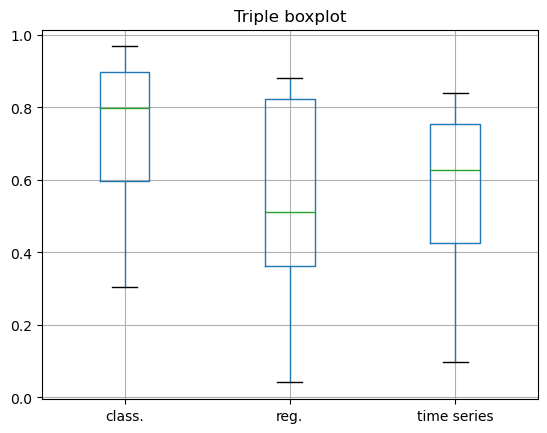

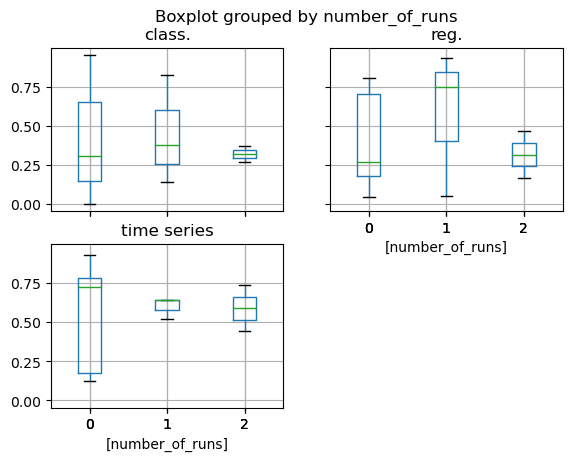

In [40]:
# Generate 4 columns with 10 observations
df = pd.DataFrame(data = np.random.random(size=(10,3)), columns = ['class.','reg.','time series'])
print(df)

boxplot = df.boxplot()
plt.title('Triple boxplot')
plt.show()

df = pd.DataFrame(data = np.random.random(size=(10,3)), columns = ['class.','reg.','time series'])
df['number_of_runs'] = [0,0,0,1,1,2,0,1,2,0]

boxplot = df.boxplot(by='number_of_runs')
plt.show()

### Scatterplot

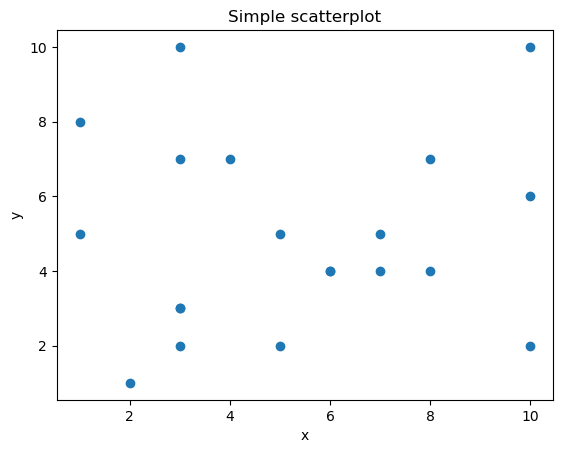

In [19]:
# We load the data gain
x = [3,8,3,4,1,7,5,3,8,2,7,3,1,6,10,10,3,6,5,10]
y = [10,7,2,7,5,4,2,3,4,1,5,7,8,4,10,2,3,4,5,6]

# Here, we build a simple scatterplot of the two variables
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simple scatterplot')
plt.show()

Hard to tell which variable is what, but it gives an overall impression of the data.

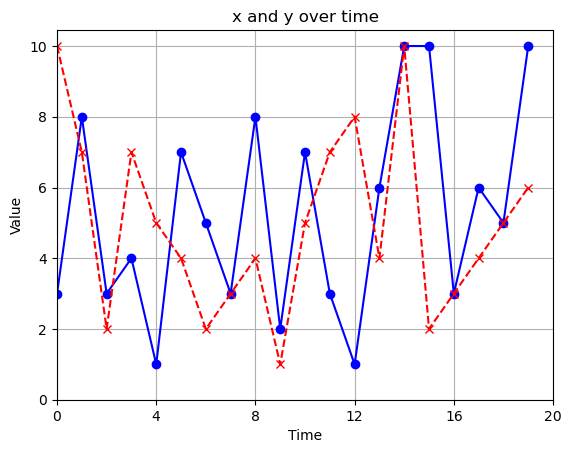

In [42]:
# A simple line plot

# We use the plot function for this. 'o-' indicates we want to use circles for markers and connect them with lines
plt.plot(x,'o-',color='blue',)

# Here we use 'x--' for cross-shaped markers connected with intermittent lines
plt.plot(y,'x--',color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title("x and y over time")

# This function sets the range limits for the x axis at 0 and 20
plt.xlim(0,20)

# Adding a grid
plt.grid(True)

# Adding markets on the x and y axis. We start at zero, make our way to 10 (the last integer is not included,
# hence we use 21 and 11)
# We add steps of 4 for the x axis, and 4 for the y axis
plt.xticks(range(0,21,4))
plt.yticks(range(0,11,2))

plt.show()

# Nice plot with package `Seaborn`!

Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

Please visit https://seaborn.pydata.org/ for details!

If you would like to look at some examples of `Seaborn`, please refer to `Figs`!